In [610]:
import pandas as pd
import os
os.getcwd()

'C:\\Users\\tazan\\house_price\\input'

In [611]:
# os.chdir('input')

In [612]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [613]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import torch

In [614]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [615]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1460 entries, 0 to 1459

Data columns (total 81 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   Id             1460 non-null   int64  

 1   MSSubClass     1460 non-null   int64  

 2   MSZoning       1460 non-null   object 

 3   LotFrontage    1201 non-null   float64

 4   LotArea        1460 non-null   int64  

 5   Street         1460 non-null   object 

 6   Alley          91 non-null     object 

 7   LotShape       1460 non-null   object 

 8   LandContour    1460 non-null   object 

 9   Utilities      1460 non-null   object 

 10  LotConfig      1460 non-null   object 

 11  LandSlope      1460 non-null   object 

 12  Neighborhood   1460 non-null   object 

 13  Condition1     1460 non-null   object 

 14  Condition2     1460 non-null   object 

 15  BldgType       1460 non-null   object 

 16  HouseStyle     1460 non-null   object 

 17  OverallQual    1460 non-null  

In [616]:
#nan값들 처리 필요(null)
#id 열 삭제

In [617]:
train_id=df_train['Id']
test_id=df_test['Id']

In [618]:
df_train.drop('Id',axis=1,inplace=True)
df_test.drop('Id',axis=1,inplace=True)

In [619]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


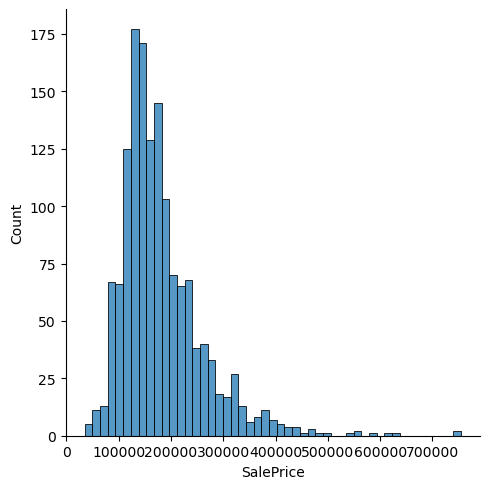

In [620]:
sns.displot(df_train['SalePrice'])
#train 데이터의 saleprice(target)의 skewness가 편향되어있어서 log함수로 교정

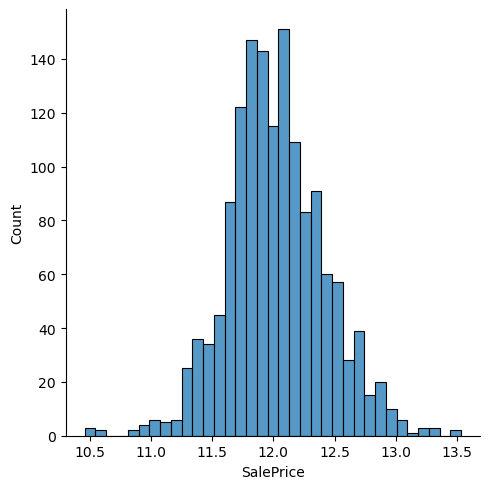

In [621]:
df_train.SalePrice=np.log1p(df_train.SalePrice)
sns.displot(df_train['SalePrice'])

In [622]:
ntrain=df_train.shape[0]
ntest=df_test.shape[0]
#shape를 할 경우 (n,n)형태로 행*열 개수 반환, [0]을 하면 앞의 행 개수 return
y_train=df_train['SalePrice'].values
#SalePrice 값은 Y_train에 할당, df_train에서는 삭제

In [623]:
#train,test 데이터 합치기(nan 일괄 처리를 위해서)
all_data=pd.concat((df_train,df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
all_data.shape

(2919, 79)

In [624]:
all_na=(all_data.isnull().sum()/len(all_data))*100
#각 열별 누락개수/각 열의 원소 수*100 의 값을 담은 series  생성
all_na=all_na.drop(all_na[all_na==0].index).sort_values(ascending=False)[:] #위 series에서 누락 개수가 0개인 열 제외
print(all_na)
print('-'*50)
print('num of columns that have nan: ',all_na.shape[0])

PoolQC          99.657417

MiscFeature     96.402878

Alley           93.216855

Fence           80.438506

FireplaceQu     48.646797

LotFrontage     16.649538

GarageFinish     5.447071

GarageQual       5.447071

GarageCond       5.447071

GarageYrBlt      5.447071

GarageType       5.378554

BsmtExposure     2.809181

BsmtCond         2.809181

BsmtQual         2.774923

BsmtFinType2     2.740665

BsmtFinType1     2.706406

MasVnrType       0.822199

MasVnrArea       0.787941

MSZoning         0.137033

BsmtFullBath     0.068517

BsmtHalfBath     0.068517

Functional       0.068517

Utilities        0.068517

GarageArea       0.034258

GarageCars       0.034258

Electrical       0.034258

KitchenQual      0.034258

TotalBsmtSF      0.034258

BsmtUnfSF        0.034258

BsmtFinSF2       0.034258

BsmtFinSF1       0.034258

Exterior2nd      0.034258

Exterior1st      0.034258

SaleType         0.034258

dtype: float64

--------------------------------------------------

num of columns

Text(0.5, 1.0, 'Percent missing data by feature')

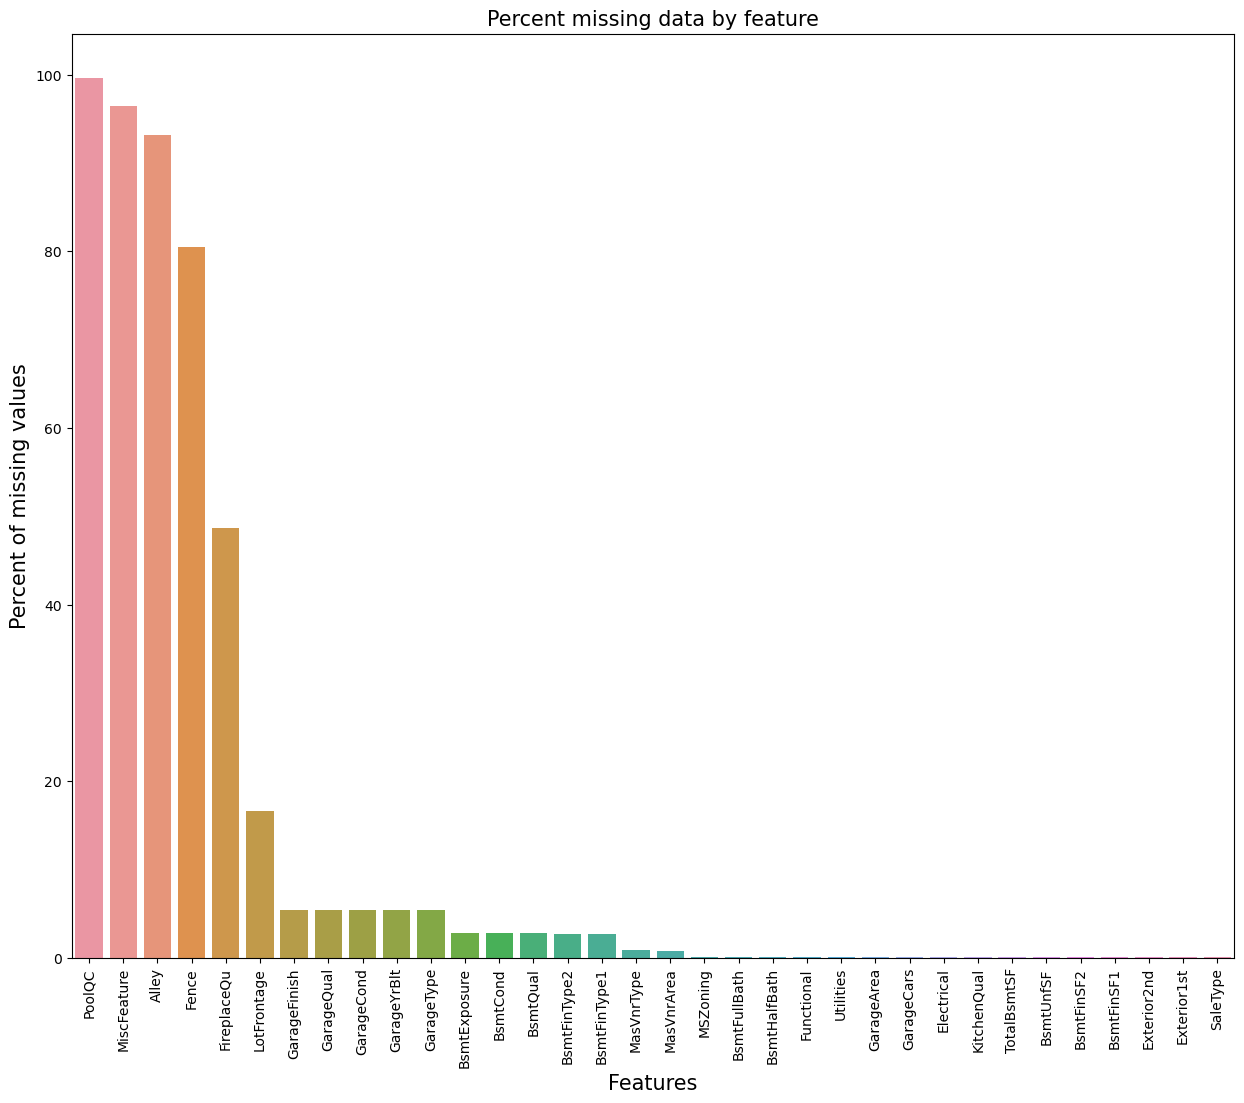

In [625]:
#nan 값을 가진 열들의 nan 비율을 더 쉽게 보기 위해 그래프 생성
f,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90') #x축 레이블 회전(x축 눈금의 라벨)
sns.barplot(x=all_na.index,y=all_na)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
#seaborn,pyplot 공부 필요

nan 데이터 들을 적절히 처리해줘야함

In [626]:
#PoolQC:수영장 퀄리티
all_data.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [627]:
#PoolQC가 nan이라면 수영장이 없다는걸로 간주, 아예 없다는 뜻의 None 항목 추가
all_data["PoolQC"]=all_data["PoolQC"].fillna("None")
print(all_data.PoolQC.value_counts())

None    2909

Ex         4

Gd         4

Fa         2

Name: PoolQC, dtype: int64


In [628]:
#MiscFeature:여러가지 기능들
all_data.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [629]:
all_data.MiscFeature=all_data.MiscFeature.fillna("None")
all_data.MiscFeature.value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [630]:
#alley:골목길에 접근하는 방법
all_data.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [631]:
all_data.Alley=all_data.Alley.fillna("None")
all_data.Alley.value_counts()

None    2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [632]:
#Fence:울타리 유형
all_data.Fence.value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [633]:
all_data.Fence=all_data.Fence.fillna("None")
all_data.Fence.value_counts()

None     2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [634]:
#FireplaceQu:벽난로 품질
all_data.FireplaceQu.value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [635]:
all_data.FireplaceQu=all_data.FireplaceQu.fillna("None")
all_data.FireplaceQu.value_counts()

None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

In [636]:
#LotFrontage:연결된 도로의 선형 피트
all_data["LotFrontage"].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [637]:
#각 지역별로 거리의 피트가 비슷할 것이라는 예측을 이용
all_data["LotFrontage"].fillna(all_data.groupby("Neighborhood")["LotFrontage"].transform('median'),inplace=True) 
#groupby함수,transform함수를 이용해 각 neighborhood별로 중위값을 계산해 [neighborhood,neighbor별 LotFrontage의 중위값]
#꼴의 시리즈 생성,Neighborhood에 따라 생성된 시리즈의 값 입력

In [638]:
all_data["LotFrontage"].describe()

count    2919.000000
mean       69.542994
std        21.703256
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [639]:
all_data[["Neighborhood","LotFrontage"]].head(30)

,Neighborhood,LotFrontage
0,CollgCr,65.0
1,Veenker,80.0
2,CollgCr,68.0
3,Crawfor,60.0
4,NoRidge,84.0
5,Mitchel,85.0
6,Somerst,75.0
7,NWAmes,80.0
8,OldTown,51.0
9,BrkSide,50.0


In [640]:
#차고 관련 데이터들
all_data[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head()

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
0,2003.0,Attchd,2.0,548.0,TA,TA,RFn
1,1976.0,Attchd,2.0,460.0,TA,TA,RFn
2,2001.0,Attchd,2.0,608.0,TA,TA,RFn
3,1998.0,Detchd,3.0,642.0,TA,TA,Unf
4,2000.0,Attchd,3.0,836.0,TA,TA,RFn


In [641]:
#nan일 경우 차고가 없다고 간주
#각 열 별로 numeric,categorical에 따라 다르게 수정
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna("None") #년도
all_data['GarageType'] = all_data['GarageType'].fillna("None")
all_data['GarageQual'] = all_data['GarageQual'].fillna("None")
all_data['GarageCond'] = all_data['GarageCond'].fillna("None")
all_data['GarageFinish'] = all_data['GarageFinish'].fillna("None")
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)

In [642]:
all_data[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head() 

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
0,2003.0,Attchd,2.0,548.0,TA,TA,RFn
1,1976.0,Attchd,2.0,460.0,TA,TA,RFn
2,2001.0,Attchd,2.0,608.0,TA,TA,RFn
3,1998.0,Detchd,3.0,642.0,TA,TA,Unf
4,2000.0,Attchd,3.0,836.0,TA,TA,RFn


In [643]:
#지하실 관련 데이터
all_data[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']].head(20) 

,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
0,Unf,No,GLQ,TA,Gd,1.0,0.0,856.0,706.0,0.0,150.0
1,Unf,Gd,ALQ,TA,Gd,0.0,1.0,1262.0,978.0,0.0,284.0
2,Unf,Mn,GLQ,TA,Gd,1.0,0.0,920.0,486.0,0.0,434.0
3,Unf,No,ALQ,Gd,TA,1.0,0.0,756.0,216.0,0.0,540.0
4,Unf,Av,GLQ,TA,Gd,1.0,0.0,1145.0,655.0,0.0,490.0
5,Unf,No,GLQ,TA,Gd,1.0,0.0,796.0,732.0,0.0,64.0
6,Unf,Av,GLQ,TA,Ex,1.0,0.0,1686.0,1369.0,0.0,317.0
7,BLQ,Mn,ALQ,TA,Gd,1.0,0.0,1107.0,859.0,32.0,216.0
8,Unf,No,Unf,TA,TA,0.0,0.0,952.0,0.0,0.0,952.0
9,Unf,No,GLQ,TA,TA,1.0,0.0,991.0,851.0,0.0,140.0


In [644]:
#numeric,categorical 별로 다르게 수정
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna("None")
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna("None")
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna("None")
all_data['BsmtCond'] = all_data['BsmtCond'].fillna("None")
all_data['BsmtQual'] = all_data['BsmtQual'].fillna("None")
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)

In [645]:
all_data[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF']].head(20) 

,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF
0,Unf,No,GLQ,TA,Gd,1.0,0.0,856.0
1,Unf,Gd,ALQ,TA,Gd,0.0,1.0,1262.0
2,Unf,Mn,GLQ,TA,Gd,1.0,0.0,920.0
3,Unf,No,ALQ,Gd,TA,1.0,0.0,756.0
4,Unf,Av,GLQ,TA,Gd,1.0,0.0,1145.0
5,Unf,No,GLQ,TA,Gd,1.0,0.0,796.0
6,Unf,Av,GLQ,TA,Ex,1.0,0.0,1686.0
7,BLQ,Mn,ALQ,TA,Gd,1.0,0.0,1107.0
8,Unf,No,Unf,TA,TA,0.0,0.0,952.0
9,Unf,No,GLQ,TA,TA,1.0,0.0,991.0


In [646]:
#석공 베니어(벽돌관련 항목)
all_data.MasVnrArea.value_counts()

0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: MasVnrArea, Length: 444, dtype: int64

In [647]:
all_data.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [648]:
all_data.MasVnrArea=all_data.MasVnrArea.fillna(0)
all_data.MasVnrType=all_data.MasVnrType.fillna("None")

In [649]:
all_data.MasVnrArea.value_counts()

0.0      1761
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: MasVnrArea, Length: 444, dtype: int64

In [650]:
all_data.MasVnrType.value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [651]:
#전기
all_data.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [652]:
#대부분 SBrkr(Standard Circuit Breakers & Romex, 표준)일 것으로 추정
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr")
all_data.Electrical.value_counts()

SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [653]:
#구역 구분(산업,쇼핑,문화 등으로 구분)
all_data.MSZoning.value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [654]:
#최빈 값인 주거용 구역(저밀도)로 추정
all_data.MSZoning=all_data.MSZoning.fillna('RL')
all_data.MSZoning.value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [655]:
#전기,가스,물,정화조 유무
all_data.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [656]:
#최빈값으로 수정
all_data.Utilities=all_data.Utilities.fillna("AllPub")
all_data.Utilities.value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [657]:
#집 상태로 추정
all_data.Functional.value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [658]:
#최빈값으로 수정
all_data.Functional=all_data.Functional.fillna("Typ")
all_data.Functional.value_counts()

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [659]:
#판매 유형
all_data.SaleType.value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [660]:
#최빈값으로 수정
all_data.SaleType=all_data.SaleType.fillna("WD")
all_data.SaleType.value_counts()

WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [661]:
#주방 퀄리티
all_data.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [662]:
#최빈값으로 수정(Typical)
all_data.KitchenQual=all_data.KitchenQual.fillna("TA")
all_data.KitchenQual.value_counts()

TA    1493
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [663]:
#집 외부 마감재1
all_data.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [664]:
#집 외부 마감재2
all_data.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [665]:
#최빈값으로 수정(mode()함수 사용해봄)
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data.Exterior1st.mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data.Exterior2nd.mode()[0])

In [666]:
all_data.Exterior1st.value_counts()

VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [667]:
all_data.Exterior2nd.value_counts()

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [668]:
all_na=(all_data.isnull().sum()/len(all_data))*100
#각 열별 누락개수/각 열의 원소 수*100 의 값을 담은 series  생성
all_na=all_na.drop(all_na[all_na==0].index).sort_values(ascending=False)[:30] #위 series에서 누락 개수가 0개인 열 제외,
#내림차순으로 정렬 후 30개 슬라이싱
missing_data=pd.DataFrame({'Missing Ratio':all_na}) #시리즈 데이터프레임으로 변환
missing_data.head()

,Missing Ratio


여기까지는 all_data의 na값을 적절히 처리해줌
다음부터는 연관관계에 따라 열 자체를 수정해줄 예정

In [669]:
all_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
7,60,RL,80.0,10382,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,...,0,0,None,None,None,0,1,2008,WD,Normal


In [670]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.542994,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,49.565262,...,472.712573,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,21.703256,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,169.179104,...,215.535686,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,70.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [671]:
all_data["Utilities"].value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [672]:
all_data.drop('Utilities', axis=1, inplace=True)  #값이 거의 같아서 제거하는게 나음
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,0,None,None,None,0,12,2008,WD,Normal


In [673]:
corr=df_train.corr(method='pearson').drop(['SalePrice']).sort_values('SalePrice',ascending=False)['SalePrice']  
#DataFrame.corr함수는 각 열관의 상관 관계를 보여줌. SalePrice와 각 열들의 피어슨 상관계수를 보기위해 
#corr로 우선 모든 열간의 피어슨 상관계수 데이터프레임 생성, Saleprice열 제거(어차피 1나옴), 그 이후 행들을 SalePrice를 기준으로 정렬, Saleprice열만 출력
corr

OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

In [674]:
#sale price와 피어슨 계수가 -0.1~0.1인것을 삭제하는것이 좋음
all_data.drop('PoolArea', axis=1, inplace=True)
all_data.drop('MoSold', axis=1, inplace=True)
all_data.drop('3SsnPorch', axis=1, inplace=True)
all_data.drop('BsmtFinSF2', axis=1, inplace=True)
all_data.drop('BsmtHalfBath', axis=1, inplace=True)
all_data.drop('MiscVal', axis=1, inplace=True)
all_data.drop('LowQualFinSF', axis=1, inplace=True)
all_data.drop('YrSold', axis=1, inplace=True)
all_data.drop('OverallCond', axis=1, inplace=True)
all_data.drop('MSSubClass', axis=1, inplace=True)

In [675]:
all_data.shape

(2919, 68)

In [676]:
from sklearn.preprocessing import LabelEncoder #category 타입을 numerical 타입으로 변형
from scipy import stats
from scipy.stats import norm,skew #가우시안 정규분포, 왜도
#왜도가 양수->분포 그래프가 좌측으로 치우침, 음수->우측으로 치우침

In [677]:
numeric_features=all_data.dtypes[all_data.dtypes!="object"].index  
#1. all_data.dtypes를 할 경우 행의 index는 all_data의 열, 값은 all_data 열 별 데이터 타입인 시리즈가 나옴
#2. [all_data.dtypes!="object"]를 통해 그 시리즈들 중 데이터타입이 object가 아닌 열들만을 index로 가진 시리즈 생성(열의
# 값중 하나라도 object포함시 X
#3. 그 시리즈들의 index를 추출->all_data의 열들중 object값을 가지지 않은 열이름만 추출 가능
numeric_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch'],
      dtype='object')

In [678]:
skewed_feats=all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n") #all_data[numeric_features]를 통해 all_data에서 numeric_features를 가진 
#열들만 뽑아낸 매트릭스 리턴 , 람다를 통해 na를 포함한 행을 탈락시킨 각 열들의 왜도 추출 ->type=series
skewness=pd.DataFrame({'Skew' :skewed_feats})
skewness



Skew in numerical features: 




,Skew
LotArea,12.822431
KitchenAbvGr,4.302254
EnclosedPorch,4.003891
ScreenPorch,3.946694
MasVnrArea,2.613592
OpenPorchSF,2.535114
WoodDeckSF,1.842433
LotFrontage,1.505704
1stFlrSF,1.469604
BsmtFinSF1,1.425230


In [679]:
skewness=skewness[abs(skewness)>0.5] #외도 -0.5~0.5 밖의 변수들은 log함수로 가공
all_data[skewness.index]=np.log1p(all_data[skewness.index])

In [680]:
skewed_feats=all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n") #all_data[numeric_features]를 통해 all_data에서 numeric_features를 가진 
#열들만 뽑아낸 매트릭스 리턴 , 람다를 통해 na를 포함한 행을 탈락시킨 각 열들의 왜도 추출 ->type=series
#여기서 왜 갑자기 series로 바뀌는지 모르겠음
skewness=pd.DataFrame({'Skew' :skewed_feats})
skewness



Skew in numerical features: 




,Skew
KitchenAbvGr,3.520351
ScreenPorch,2.945905
EnclosedPorch,1.961081
HalfBath,0.580692
MasVnrArea,0.537018
BsmtFullBath,0.425167
2ndFlrSF,0.305049
Fireplaces,0.237587
WoodDeckSF,0.158033
1stFlrSF,0.064828


categorial 변수들을 수로 변환(순서에 따라)

In [681]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir')
for c in cols:
    lbl=LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c]=lbl.transform(list(all_data[c].values))
    
all_data.shape

(2919, 68)

In [682]:
all_data=pd.get_dummies(all_data) #수치로 변환한 categorial변수들중 서로간 상관관계가 없는 변수들 dummy화 진행
print(all_data.shape)

(2919, 313)


In [683]:
all_data.head()

,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,1,1,3,0,2.079442,7.602900,7.602900,5.283204,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,1,1,3,0,1.945910,7.589336,7.589336,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,1,1,0,0,2.079442,7.601902,7.602401,5.093750,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,1,1,0,0,2.079442,7.557995,7.586296,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,1,1,0,0,2.197225,7.601402,7.601402,5.860786,...,0,0,0,1,0,0,0,0,1,0


In [684]:
train=all_data[:ntrain]
test=all_data[ntrain:]
#split

In [685]:
train.shape

(1460, 313)

In [686]:
test.shape

(1459, 313)

In [687]:
print(ntrain,ntest)

1460 1459


In [688]:
train.head()

,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,1,1,3,0,2.079442,7.602900,7.602900,5.283204,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,1,1,3,0,1.945910,7.589336,7.589336,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,1,1,0,0,2.079442,7.601902,7.602401,5.093750,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,1,1,0,0,2.079442,7.557995,7.586296,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,1,1,0,0,2.197225,7.601402,7.601402,5.860786,...,0,0,0,1,0,0,0,0,1,0


In [689]:
print(y_train)

[12.24769912 12.10901644 12.31717117 ... 12.49313327 11.86446927

 11.90159023]


In [690]:
#1. 직접 가설함수, loss함수 정의해서 auto grad 이용

# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim

# # x train, y train 모두 텐서로 변환
# x_train=torch.Tensor(train.values) #데이터 프레임은 바로 변환 불가
# y_train=torch.Tensor(y_train)

# W=torch.zeros((313,1),requires_grad=True)
# b=torch.zeros(1,requires_grad=True)
# optimizer=optim.SGD([W,b], lr=1e-5)

# nb_epochs=2000
# for epoch in range(nb_epochs+1):
#     hypothesis=x_train.matmul(W)+b
    
#     cost=torch.mean((hypothesis-y_train)**2)
    
#     optimizer.zero_grad()
#     cost.backward()
#     optimizer.step()
    
#     if epoch%100==0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(
#           epoch, nb_epochs, cost.item()
#       ))

# x_test=torch.Tensor(test.values)
# y_test=torch.Tensor((1,ntest))
# y_test=x_test.matmul(W)+b
# print(y_test.shape)
# print(y_test)
# result=y_test.detach().numpy()
# # print(np.exp(result))
# # result_1=pd.DataFrame(np.exp(result))
# result_1=pd.DataFrame(result)
# s=pd.Series(range(1461,2920))
# result_1=result_1.set_index(keys=[s])
# result_1.columns=['SalePrice']
# print(result_1)
# result_1.to_csv('./house_price_submission.csv')

In [691]:
# #2. nn.module 이용

# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# x_train=torch.Tensor(train.values)
# y_train=torch.Tensor(y_train)
# y_train=y_train.unsqueeze(dim=1)
# #y_train을 (313, ) 에서 (313,1)로 변경
# model=nn.Linear(313,1) #313개의 x, 1개의 y
# # print(list(model.parameters())) #random values

# optimizer=torch.optim.SGD(model.parameters(),lr=1e-5) # 모델이 파라미터 w,b를 가지고 있고 해당 파라미터들은 requires_grad가 켜져있음

# nb_epochs=2000
# for epoch in range(nb_epochs+1):
#     prediction=model(x_train) #model 안의 forward함수 호출, prediction에 인풋을 넣어서 나온 아웃풋 값 저장
#     cost=F.mse_loss(prediction,y_train) #Functional 모듈에서 mean squared error 기능 제공
    
#     optimizer.zero_grad()
    
#     cost.backward()
    
#     optimizer.step()
    
#     if epoch%100==0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(
#           epoch, nb_epochs, cost.item()
#       ))


In [692]:
#모델 클래스,배치 구현
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x_train=torch.Tensor(train.values)
y_train=torch.Tensor(y_train)
y_train=y_train.unsqueeze(dim=1)

dataset=TensorDataset(x_train,y_train)
dataloader=DataLoader(dataset,batch_size=32, shuffle=True)

class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(313,1)
        
    def forward(self,x):
        return self.linear(x)
    
model=MultivariateLinearRegressionModel()

optimizer=torch.optim.SGD(model.parameters(),lr=1e-3)

nb_epochs=20
for epoch in range(nb_epochs+1):
   for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train,y_train=samples
    prediction=model(x_train)
    
    cost=F.mse_loss(prediction,y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('Epoch {:4d}/{} Batch {:5d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

x_test=torch.Tensor(test.values)
y_test=model(x_test).squeeze()
y_test=y_test.detach().numpy()
y_test=np.expm1(y_test)
# print(np.exp(result))
# result_1=pd.DataFrame(np.exp(result))
result=pd.DataFrame({"Id":test_id,"SalePrice":y_test})
result.to_csv('./house_price_submission.csv',index=False)

Epoch    0/20 Batch     1/46 Cost: 116.311951

Epoch    0/20 Batch     2/46 Cost: 19.594206

Epoch    0/20 Batch     3/46 Cost: 4.707638

Epoch    0/20 Batch     4/46 Cost: 0.992546

Epoch    0/20 Batch     5/46 Cost: 0.423645

Epoch    0/20 Batch     6/46 Cost: 0.257945

Epoch    0/20 Batch     7/46 Cost: 0.202112

Epoch    0/20 Batch     8/46 Cost: 0.308426

Epoch    0/20 Batch     9/46 Cost: 0.294505

Epoch    0/20 Batch    10/46 Cost: 0.284038

Epoch    0/20 Batch    11/46 Cost: 0.238633

Epoch    0/20 Batch    12/46 Cost: 0.244992

Epoch    0/20 Batch    13/46 Cost: 0.172714

Epoch    0/20 Batch    14/46 Cost: 0.162545

Epoch    0/20 Batch    15/46 Cost: 0.334504

Epoch    0/20 Batch    16/46 Cost: 0.175875

Epoch    0/20 Batch    17/46 Cost: 0.186230

Epoch    0/20 Batch    18/46 Cost: 0.159085

Epoch    0/20 Batch    19/46 Cost: 0.265839

Epoch    0/20 Batch    20/46 Cost: 0.142749

Epoch    0/20 Batch    21/46 Cost: 0.121877

Epoch    0/20 Batch    22/46 Cost: 0.189816

Epoch  